# Problem Statement :- Life Insurance Company


The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents.

# Importing the liberaries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
dataset = pd.read_csv("C:\\Users\\HP\Desktop\\Sales.csv")

# Identify the target variable
target_variable = 'AgentBonus'

# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Identify columns with strong correlation to the target variable
strong_correlation_threshold = 0.5
relevant_columns = correlation_matrix[abs(correlation_matrix[target_variable]) > strong_correlation_threshold].index.tolist()

# Print the relevant column names
print("Relevant column names:")
print(relevant_columns)


Relevant column names:
['AgentBonus', 'Age', 'CustTenure', 'SumAssured']


# Importing the liberaries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
# Loading the dataset
data = pd.read_csv("C:\\Users\\HP\Desktop\\Sales.csv")


In [5]:
data.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,0.0,North,Yearly,0,3.0
3,7000003,1791,11.0,0.0,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,0.0,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


# Explore The Dataset

In [6]:
print("Dataset Overview:")
print(data.head()) 

Dataset Overview:
    CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         0.0  Third Party Partner        Salaried   
4  7000004        2955   6.0         0.0                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  E

# Preprocessing

In [7]:
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Get information about the dataset

In [8]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

# Data processing and checking for missing values

In [9]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64


# Prepare the data

In [10]:
print("Column Names:")
print(data.columns)

Column Names:
Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')


# Encode Categorical Variables

In [11]:
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split The Data Into Features And Target Variables

In [12]:
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split The Data Into Training And Testing Sets

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train The Model

In [14]:
# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

# Predict On The Test Set

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

# Predict The Bonus

In [16]:
## predit the bonus 
print('Predicted Bonus:', y_pred)

Predicted Bonus: [4237.82 3708.59 4774.55 2765.06 4179.29 4273.71 2575.84 4436.18 3520.01
 2951.15 4201.1  4873.79 3714.84 2748.11 1928.62 4221.94 4115.03 4829.18
 3579.12 4132.51 6600.36 7091.87 4410.65 4839.86 3431.85 3615.02 4127.37
 2315.13 5441.71 4918.17 3832.24 4136.06 5226.72 4563.78 5838.18 4168.3
 2167.71 6955.66 4783.23 2404.42 6866.05 3139.68 4540.35 4977.55 4284.3
 3703.18 3583.35 4910.38 5238.25 4959.27 4607.37 3979.38 4747.74 3513.32
 3374.04 4067.46 4603.92 2459.18 4287.27 1996.71 3527.83 2852.52 4402.03
 4075.87 5523.91 4108.72 5701.2  3852.97 2472.24 2719.88 3264.22 4546.26
 5526.57 4747.7  3814.54 4172.58 3621.72 4447.91 6644.64 3840.34 3726.97
 3112.13 3400.03 3882.13 2760.07 5112.2  3059.28 4011.09 3419.17 2090.65
 3079.15 3336.94 2473.28 2359.37 4811.63 3948.61 2618.18 5863.14 3352.4
 2688.32 4063.97 2125.77 4630.36 3073.61 2454.65 5918.68 2699.54 2602.67
 2761.58 2869.55 4667.01 3252.11 3229.07 3705.77 4110.19 2709.84 4239.12
 2188.37 4314.3  2781.58 2961.08 3184

# show in kind of graph

In [17]:
import matplotlib.pyplot as plt

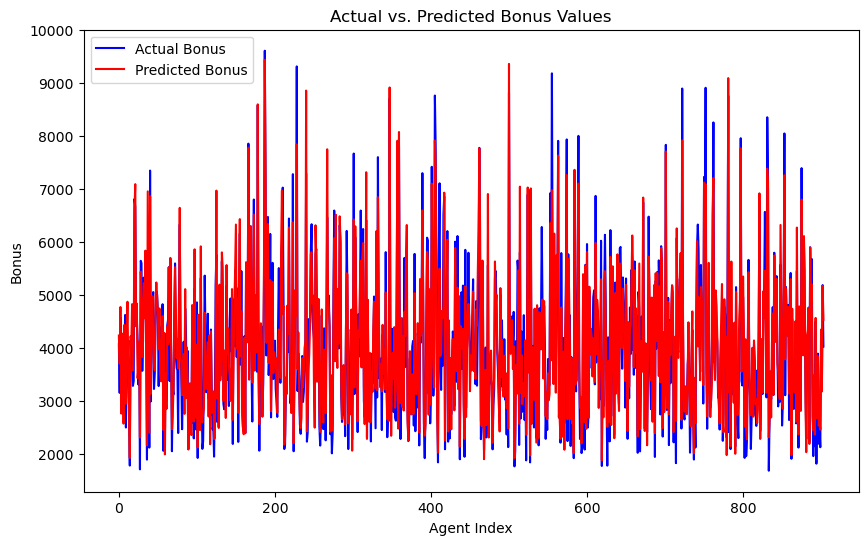

In [18]:
y_pred = model.predict(X_test)

# Create a range of agent indices
agent_indices = range(len(y_test))

# Plot the predicted bonus values as a line graph
plt.figure(figsize=(10, 6))
plt.plot(agent_indices, y_test, color='blue', label='Actual Bonus')
plt.plot(agent_indices, y_pred, color='red', label='Predicted Bonus')
plt.xlabel('Agent Index')
plt.ylabel('Bonus')
plt.title('Actual vs. Predicted Bonus Values')
plt.legend()
plt.show()

# Evaluate The Model

In [19]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 292119.82718882745


Mean Squared Error: 292119.82718882745


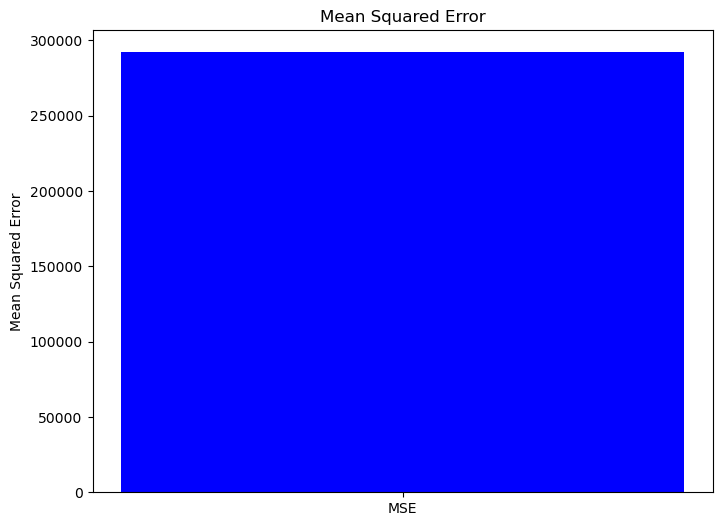

In [20]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Create a bar graph of mean squared error
plt.figure(figsize=(8, 6))
plt.bar(['MSE'], [mse], color='blue')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error')
plt.show()

# Plot in a kind of graph 

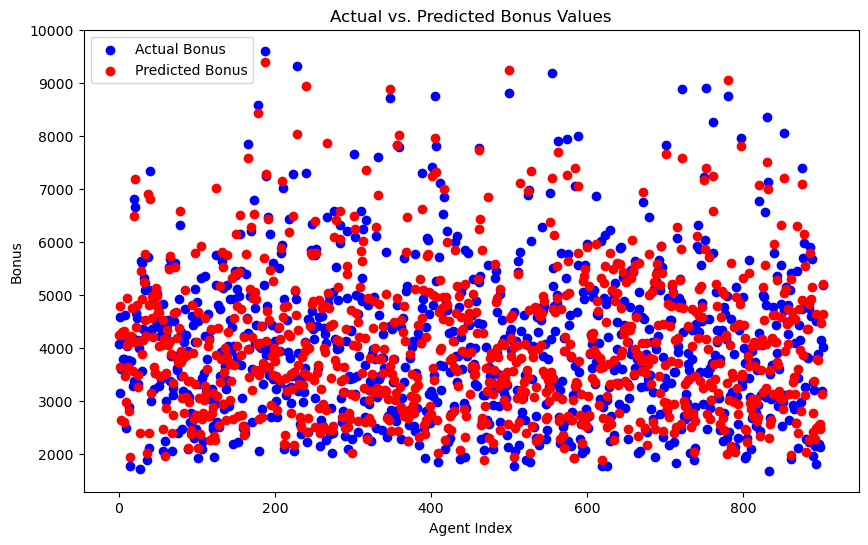

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt


# Load the dataset
data = pd.read_csv("C:\\Users\\HP\Desktop\\Sales.csv")

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest in this example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the predicted bonus values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Bonus')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Bonus')
plt.xlabel('Agent Index')
plt.ylabel('Bonus')
plt.title('Actual vs. Predicted Bonus Values')
plt.legend()
plt.show()
